In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Leer los ficheros predictions.txt y truth.txt
def read_labels(file_path):
    with open(file_path, 'r') as file:
        labels = file.read().splitlines()
    return labels

In [3]:
def main(predictions_file, truth_file):
    # Leer las etiquetas de los archivos
    y_pred = read_labels(predictions_file)
    y_true = read_labels(truth_file)
    
    # Asegurarse de que ambos archivos tengan el mismo número de entradas
    assert len(y_pred) == len(y_true), "Los archivos no tienen el mismo número de etiquetas."

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred, labels=["Jedi", "Sith"])

    # Imprimir la matriz de confusión
    print("Matriz de confusión:")
    print(conf_matrix)

    # Calcular e imprimir el informe de clasificación (precisión, recall, f1-score)
    print("\nReporte de Clasificación:")
    report = classification_report(y_true, y_pred, labels=["Jedi", "Sith"], target_names=["Jedi", "Sith"])
    print(report)

    # Calcular e imprimir la exactitud general (accuracy)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Exactitud: {accuracy:.2f}")

    # Graficar la matriz de confusión usando seaborn
    plt.figure(figsize=(6,6))

    # Crear un mapa de colores personalizado
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ["#582b83","#1a7aa7", "#14bc8c","#FFE814"])
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=['Pred: Jedi', 'Pred: Sith'], yticklabels=['Real: Jedi', 'Real: Sith'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()


Matriz de confusión:
[[25 24]
 [30 21]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Jedi       0.45      0.51      0.48        49
        Sith       0.47      0.41      0.44        51

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100

Exactitud: 0.46


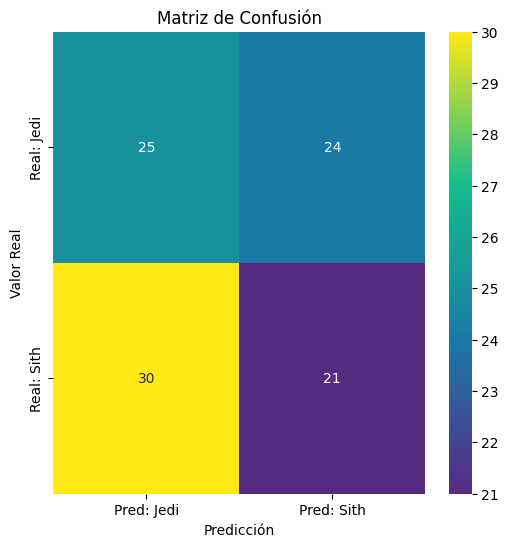

In [4]:
main("./subject/predictions.txt", "./subject/truth.txt")